## OMEGA-MAPPIN - Map Comparisons

This notebook runs through the analysis comparing different data types. 

Maps are all put into the same space - the 7500 vertices of the template brain. 
- Oscs, slopes, genes and terms are defined for each vertex.
- Anat is defined over ROIs

Data types availabe: electrophys (oscillations and slopes), genes, terms, and anatomical. 

## FUNCTION ANALYSIS

Function data all stems from the NeuroSynth meta-analytic tool for fMRI data. 

NeuroSynth does textual analysis on fMRI papers, and weights cognitive terms to anatomical locations reported in the paper. Here, we estimate the loading for each term at each of our cortical locations. We can them compare which cognitive terms, relating to function, correlate with electrophysiological signals. 

In [1]:
# Import required libraries
import sys

# Import custom code from module om, and OO code for handling data
sys.path.append('/Users/thomasdonoghue/Documents/GitCode/omegamappin/')

from om.maps.tg import MapCompTG
from om.core.db import OMDB
from om.core.io import save_obj_pickle, load_obj_pickle
from om.plts.maps import plot_corrs

# Set plots to display inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Initialize MapComp object and oscillatory bands list
db = OMDB()
om_maps = MapCompTG(db)

In [3]:
# Check files that are available
db.check_map_files(verbose=True, return_files=False)

Oscillation Files:
 Group_Osc_Scores.npz
Group_Osc_Scores_OLD.npz
Res_Group_85_Osc_prob.p
Res_Group_85_Osc_score.p 

Slope Files:
 Group_Slopes.npz 

Terms Files:
 00-ns_terms.csv
all_terms_r10_gaussian_estimation.csv
all_terms_r5_gaussian_estimation.csv 

Genes Files:
 00-real_gene_names.csv
00-real_gene_names_OLD.csv
avg_gene_estimations
sub1_gene_estimations
sub2_gene_estimations
sub3_gene_estimations
sub4_gene_estimations
sub5_gene_estimations
sub6_gene_estimations 



In [4]:
# Load oscillation maps - here using the oscillation scores
om_maps.load_meg_maps('Res_Group_85_Osc_Score')

In [5]:
# Load slope map
om_maps.load_slope_map('Res_Group_85')

In [6]:
# Load term maps - here using 10 mm spatial estimation
om_maps.load_term_maps('all_terms_r10_gaussian_estimation.csv')

In [11]:
## Calculate the correlation between all oscillation maps and terms

# Set which method to use
method = 'linear'

# Loop through all oscillations, calculating correlations
for band in om_maps.bands:
    om_maps.calc_corrs('Terms', band, method=method, stop_par=False)
    
# Calculate correlations with slopes - and shut down parallel cluster (if using) when done
om_maps.calc_corrs('Terms', 'Slopes', method=method, stop_par=True)

Running Linearly
Calculating corrs between Terms and Theta
Running Linearly
Calculating corrs between Terms and Beta
Running Linearly
Calculating corrs between Terms and LowGamma
Running Linearly
Calculating corrs between Terms and Alpha
Running Linearly
Calculating corrs between Terms and Slopes


In [12]:
# Print out highest correlated terms for each oscillation band
for band in om_maps.bands:
    om_maps.check_corrs('Terms', band, n_check=50)



Correlations for  Terms  &   Theta : 

# 	 Terms                          	 R-Vals 	 P-vals 

1 	 prefrontal                     	 0.45775 	 0.0000e+00
2 	 prefrontal cortex              	 0.45083 	 0.0000e+00
3 	 medial                         	 0.37308 	 2.2801e-246
4 	 medial prefrontal              	 0.36822 	 1.4919e-239
5 	 mpfc                           	 0.35550 	 2.7313e-222
6 	 dorsomedial                    	 0.35223 	 5.6029e-218
7 	 dorsomedial prefrontal         	 0.34109 	 1.1230e-203
8 	 cortex mpfc                    	 0.33921 	 2.5888e-201
9 	 ventromedial                   	 0.33702 	 1.3473e-198
10 	 voxel morphometry              	 0.33091 	 4.2091e-191
11 	 gray matter                    	 0.32660 	 6.2540e-186
12 	 negative                       	 0.32614 	 2.2345e-185
13 	 gray                           	 0.32307 	 9.4040e-182
14 	 morphometry                    	 0.32088 	 3.5264e-179
15 	 pfc                            	 0.31890 	 6.9106e-177
16 	 orbitofron

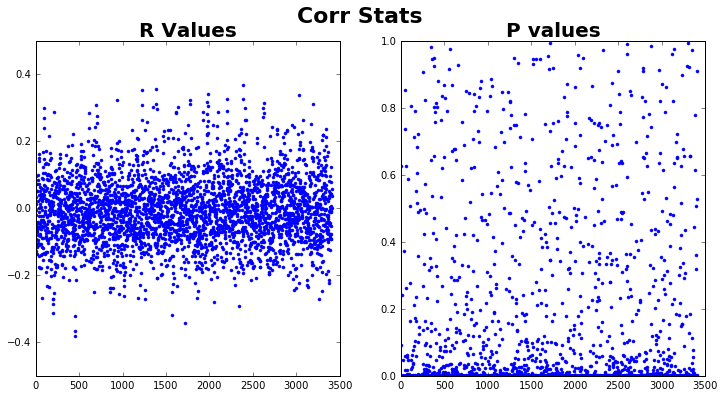

In [9]:
# Plot distribution of R and p-values
pl_dat = 'Terms'
pl_meg = 'Beta'
plot_corrs(om_maps.corrs[pl_dat][pl_meg], om_maps.p_vals[pl_dat][pl_meg])

In [13]:
# Check the correlations between term values and slope values
om_maps.check_corrs('Terms', 'Slopes')



Correlations for  Terms  &   Slopes : 

# 	 Terms                          	 R-Vals 	 P-vals 

1 	 visual                         	 0.59098 	 0.0000e+00
2 	 occipital                      	 0.51102 	 0.0000e+00
3 	 vision                         	 0.45827 	 0.0000e+00
4 	 visual cortex                  	 0.45824 	 0.0000e+00
5 	 motion                         	 0.45773 	 0.0000e+00
6 	 occipital cortex               	 0.43344 	 0.0000e+00
7 	 intraparietal                  	 0.43123 	 0.0000e+00
8 	 primary visual                 	 0.42572 	 0.0000e+00
9 	 intraparietal sulcus           	 0.42453 	 0.0000e+00
10 	 spatial                        	 0.41790 	 6.7802e-315
11 	 extrastriate                   	 0.40979 	 1.0730e-301
12 	 object                         	 0.39920 	 5.3939e-285
13 	 visuo                          	 0.39043 	 1.2510e-271
14 	 calcarine                      	 0.37742 	 1.5321e-252
15 	 visual attention               	 0.36239 	 1.5105e-231
16 	 3d              

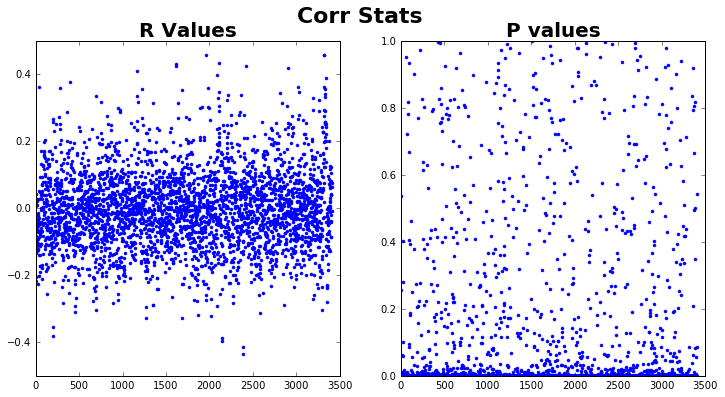

In [11]:
# Plot correlation R- and p-vals between terms & slopes
pl_dat = 'Terms'
pl_meg = 'Slopes'
plot_corrs(om_maps.corrs[pl_dat][pl_meg], om_maps.p_vals[pl_dat][pl_meg])

In [12]:
# Save calculated osc correlations to file
for band in om_maps.bands:
    om_maps.save_corrs('Terms', band, 'Gr_85', save_as_npz=True, save_as_csv=True)

# Save out correlations between terms and slopes
om_maps.save_corrs('Terms', 'Slopes', 'Gr_85', save_as_npz=True, save_as_csv=True)

In [14]:
# Save out as pickled object
#save_maps_pickle(om_maps, 'Terms')

### Plot With WordClouds

In [2]:
import matplotlib.pyplot as plt
from om.plts.wc import create_wc

In [3]:
theta_words = [('personality', 0.3063),
('patient groups', 0.3013),
('future', 0.2564),
('situations', 0.2552),
('disorder', 0.2523),
('regulate', 0.2396),
('mind', 0.2386),
('relationships', 0.2350),
('negative affect', 0.2337),
('psychological', 0.2337)]

In [4]:
alpha_words = [('visual', 0.4735),
('object', 0.4045),
('grasping', 0.3720),
('motion', 0.3642),
('shape', 0.3341),
('space', 0.3261),
('eye', 0.3187),
('hands', 0.3155),
('representations', 0.3062),
('attention', 0.2805)]

In [5]:
beta_words = [('premotor', 0.3694),
('hand', 0.3571),
('finger', 0.3526),
('movements', 0.3422),
('representation', 0.3160),
('grasping', 0.3022),
('action', 0.3012),
('reorganization', 0.2997),
('observation', 0.2892),
('mirror', 0.2888)]

In [6]:
lg_words = [('dementia', 0.4088), 
('faces', 0.3580),
('atrophy', 0.3527),
('personality', 0.3209),
('alzheimer', 0.3011),
('pathology', 0.2923),
('cognitive impairment', 0.2875),
('recognition', 0.2744),
('impairments', 0.2653),
('semantic', 0.2626)]

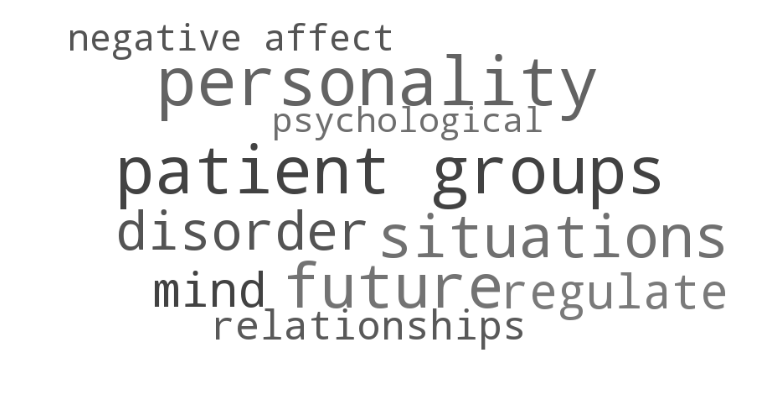

In [8]:
# Create the WordCloud
wc = create_wc(theta_words)

# Display the WordCloud
plt.imshow(wc)
plt.axis('off');